In [5]:
import pandas as pd
age_df = pd.read_csv('boneage-training-dataset.csv')

In [4]:
cd /mnt/disks/mount_point/bone_age/

/mnt/disks/mount_point/bone_age


In [32]:
#age_df

id  boneage   male
0       1377      180  False
1       1378       12  False
2       1379       94  False
3       1380      120   True
4       1381       82  False
...      ...      ...    ...
12606  15605       50  False
12607  15606      113  False
12608  15608       55  False
12609  15609      150   True
12610  15610      132   True

[12611 rows x 3 columns]

In [28]:
age_df[age_df['id'] == 6005]['boneage']

4001    82
Name: boneage, dtype: int64

In [6]:
age_df['boneage_category'] = pd.cut(age_df['boneage'], 10)

In [7]:
age_df['boneage'] = age_df['boneage'].astype(str)

In [8]:
def f(x):
    return str(x) + '.png'

In [9]:
age_df['path'] = age_df['id'].apply(f)

In [10]:
test_df = pd.read_csv('boneage-test-dataset.csv')

In [49]:
test_df

Case ID Sex
0       4360   M
1       4361   M
2       4362   M
3       4363   M
4       4364   M
..       ...  ..
195     4555   F
196     4556   F
197     4557   F
198     4558   F
199     4559   F

[200 rows x 2 columns]

In [11]:
test_df['path'] = test_df['Case ID'].apply(f)

In [ ]:
from PIL import Image
import numpy as np
ids = [6002, 6003, 6004, 6005]
img_dic = {}
for id in ids:
    path = 'boneage-training-dataset/boneage-training-dataset/{}.png'.format(id)
    img = Image.open(path)
    boneage = int(age_df[age_df['id'] == id]['boneage'])
    img_dic[id] = [img, boneage]

In [5]:
ls boneage-training-dataset/boneage-training-dataset/

10000.png  12029.png  14021.png  1818.png  3820.png  6002.png  8011.png
10001.png  12030.png  14022.png  1819.png  3821.png  6003.png  8012.png
10002.png  12031.png  14023.png  1820.png  3822.png  6004.png  8013.png
10003.png  12032.png  14024.png  1821.png  3823.png  6005.png  8014.png
10004.png  12033.png  14025.png  1823.png  3824.png  6006.png  8015.png
10005.png  12034.png  14026.png  1825.png  3825.png  6007.png  8016.png
10006.png  12035.png  14027.png  1826.png  3826.png  6008.png  8017.png
10007.png  12036.png  14029.png  1827.png  3827.png  6009.png  8019.png
10008.png  12037.png  1402.png   1828.png  3828.png  6010.png  8020.png
10009.png  12038.png  14030.png  1829.png  3829.png  6011.png  8021.png
10010.png  12039.png  14031.png  1830.png  3830.png  6013.png  8022.png
10011.png  12040.png  14032.png  1831.png  3831.png  6014.png  8023.png
10012.png  12041.png  14033.png  1832.png  3832.png  6015.png  8024.png
10013.png  12042.png  14034.png  1833.png  3833.png  6016.png  8

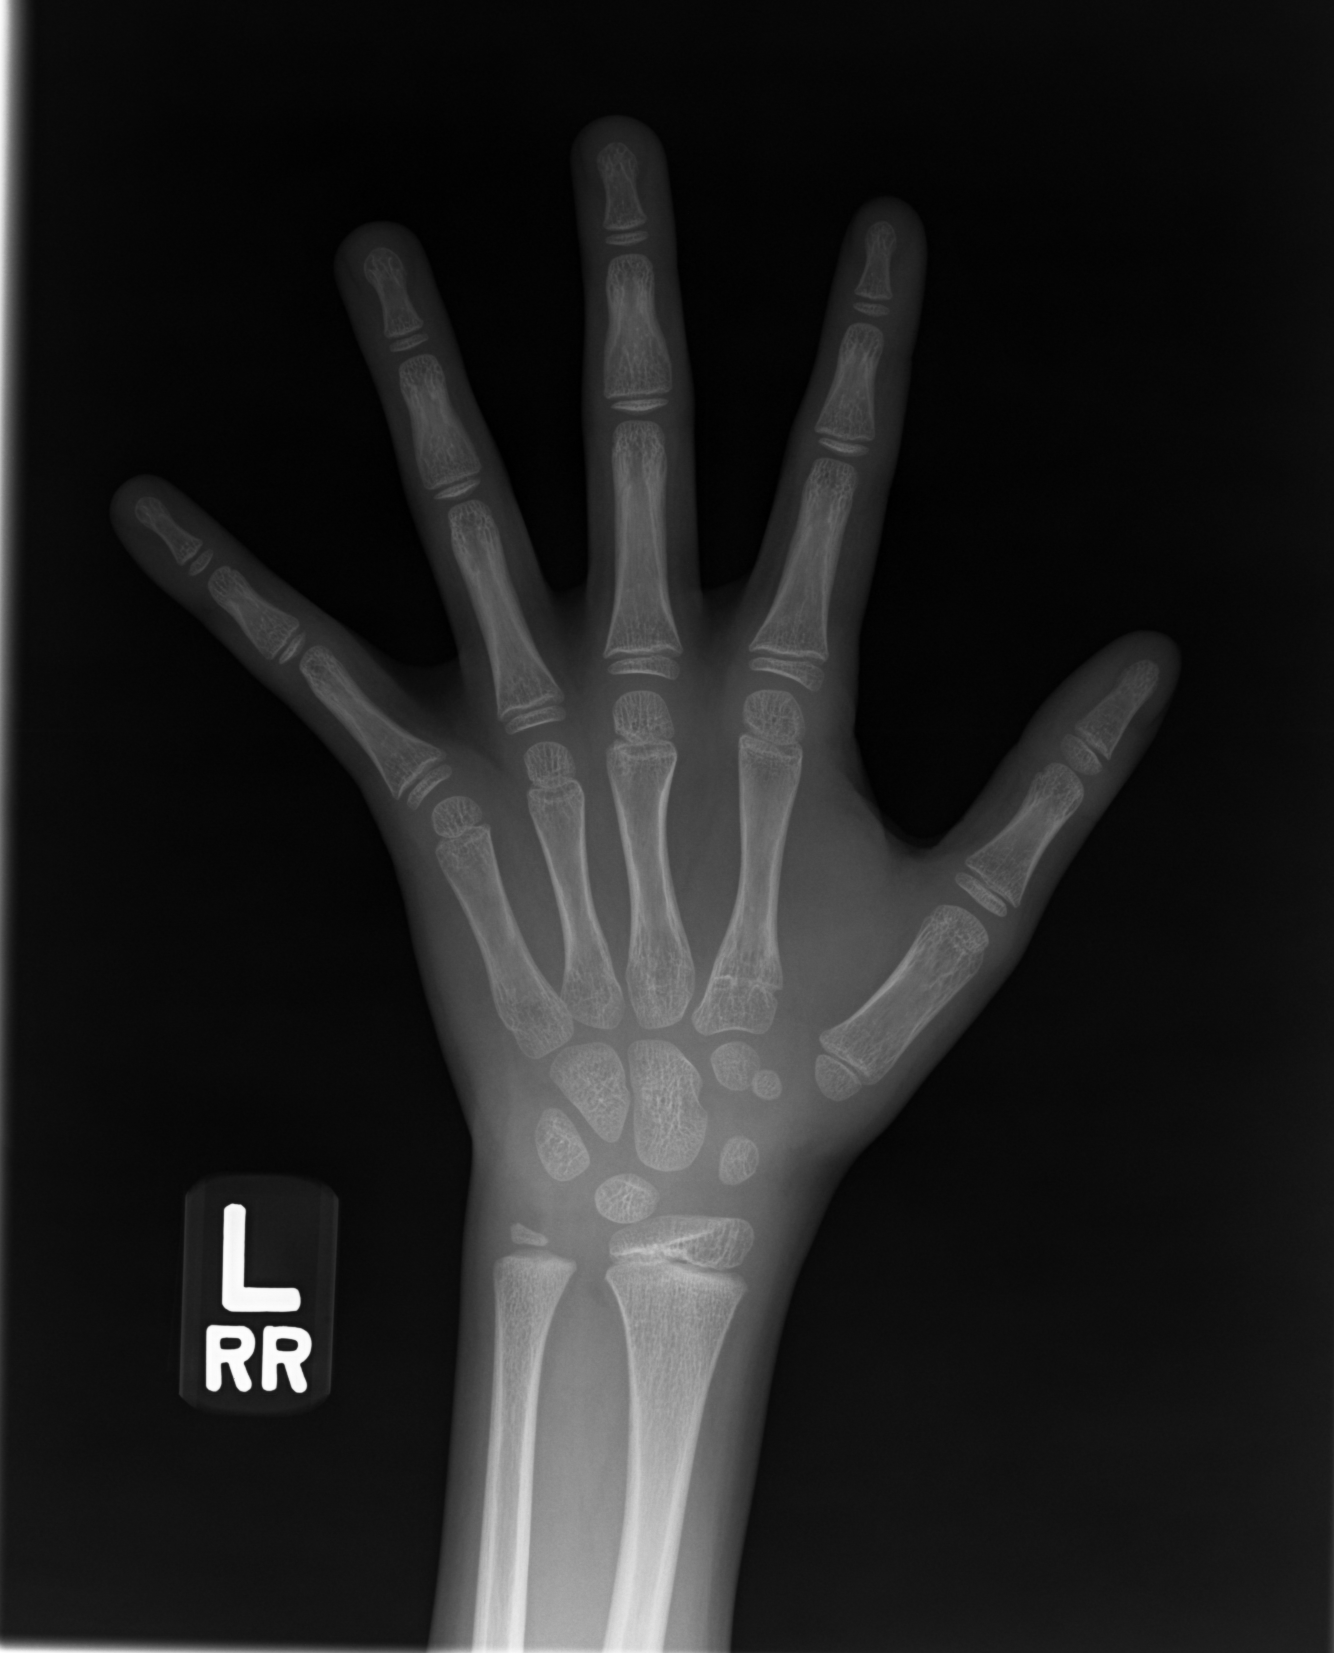

In [92]:
img

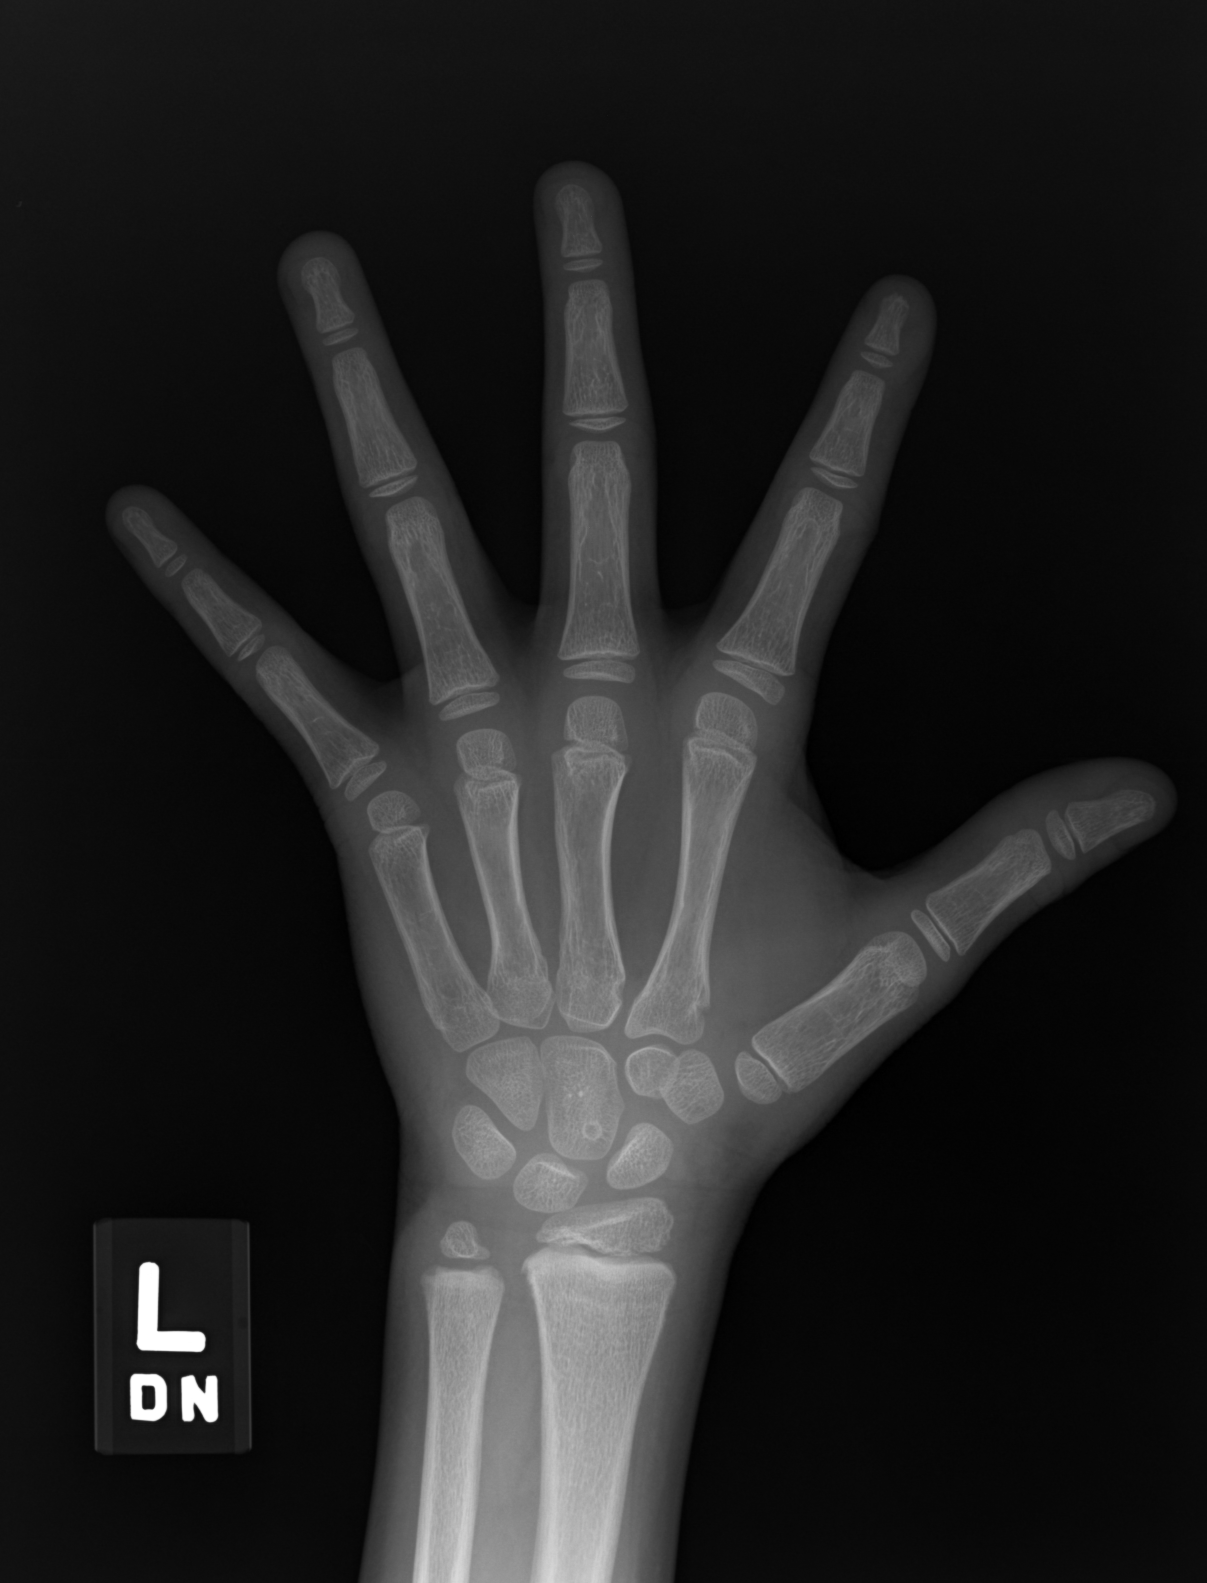

In [11]:
img5

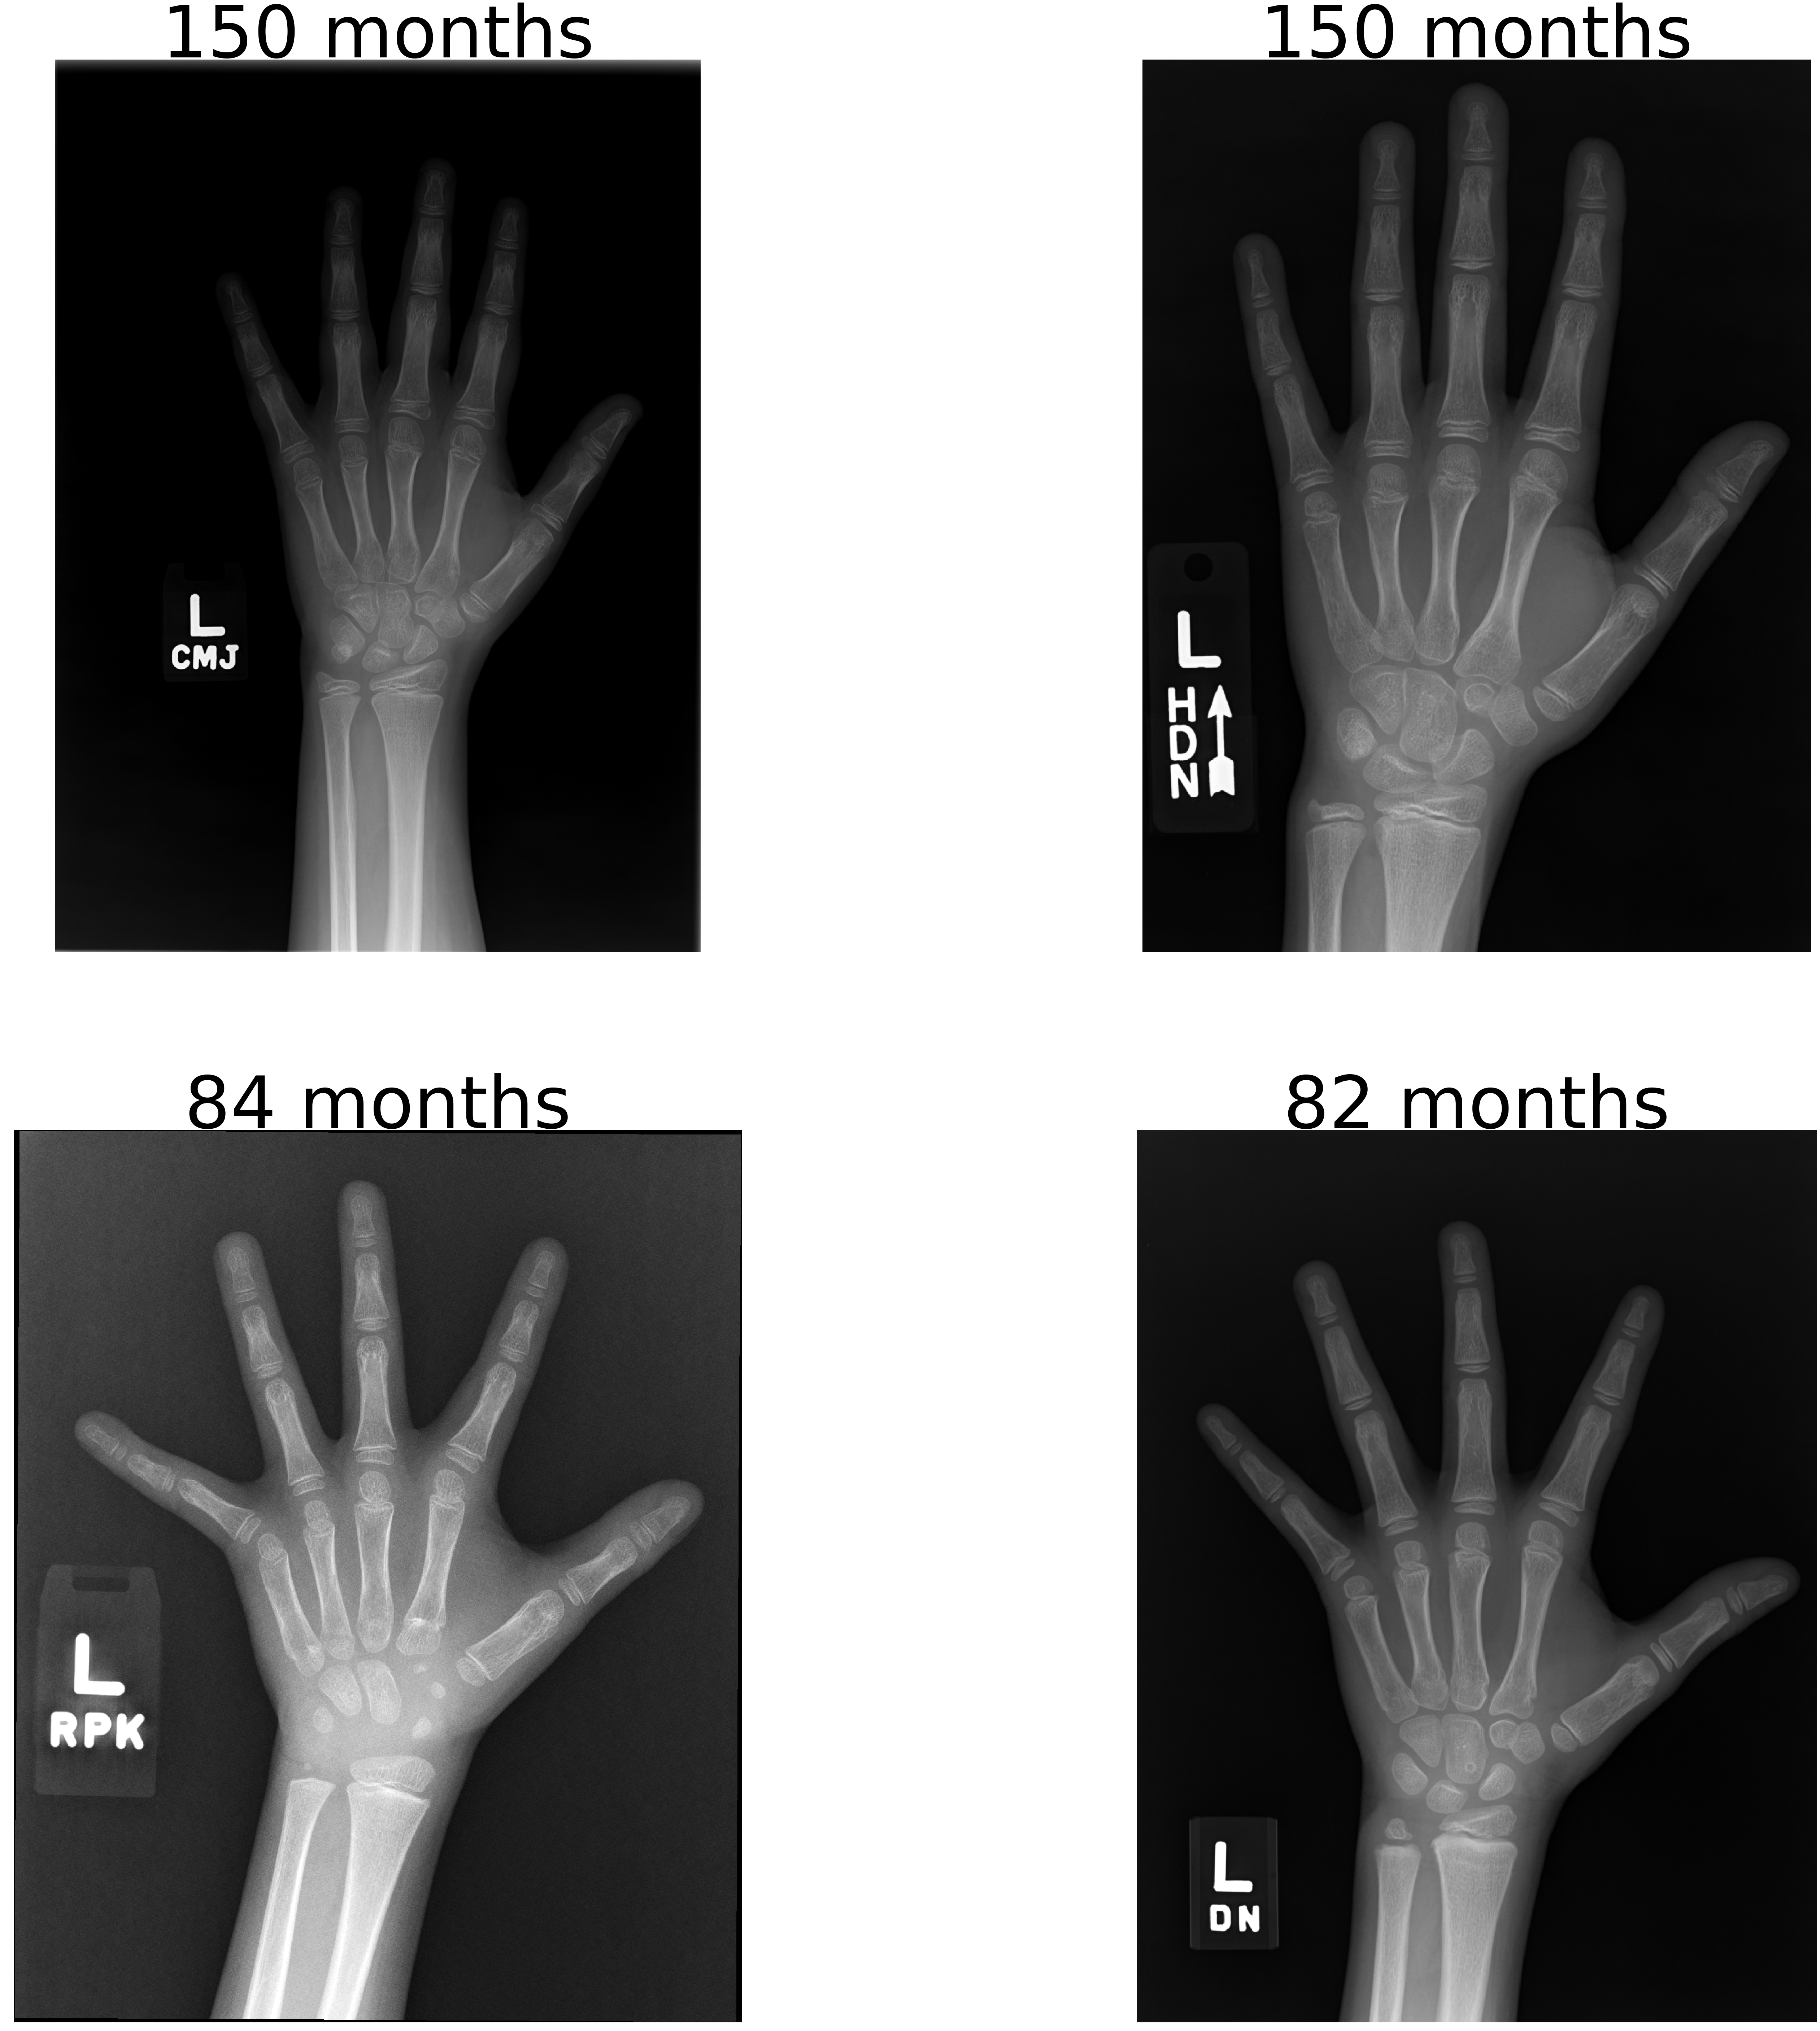

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 100))
for i, li in enumerate(img_dic.values()):
    plt.subplot(2, 2, i + 1)
    plt.imshow(li[0], cmap="gray")
    plt.axis('off')
    months = '{} months'.format(li[1])
    plt.gca().set_title(months, fontsize=200)


In [12]:
#
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(age_df, 
                                   test_size = 0.25, 
                                   random_state = 20,
                                   stratify = age_df['boneage_category'])
print('train', train_df.shape[0], 'validation', valid_df.shape[0])

train 9458 validation 3153


In [13]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os

import numpy as np

import matplotlib.pyplot as plt

In [14]:
try:
  # %tensorflow_version only exist
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
keras = tf.keras

In [15]:
from keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (380, 380) 
idg = ImageDataGenerator(samplewise_center=False, 
                              samplewise_std_normalization=False, 
                              horizontal_flip = True, 
                              vertical_flip = True, 
                              height_shift_range = 0.15, 
                              width_shift_range = 0.15, 
                              rotation_range = 5, 
                              shear_range = 0.01,
                              fill_mode = 'nearest',
                              zoom_range=0.25,
                              rescale=1./255)

Using TensorFlow backend.


In [16]:
train_gen = idg.flow_from_dataframe(train_df, 
                                    directory='/mnt/disks/mount_point/bone_age/boneage-training-dataset/boneage-training-dataset/',
                                   x_col='path',
                                   y_col='boneage',
                                   class_mode='sparse',
                                   batch_size=256,
                                   seed=10,
                                   target_size=(380, 380))

Found 9458 validated image filenames belonging to 146 classes.


In [17]:
test_idg = ImageDataGenerator(rescale=1./255)

In [18]:
valid_gen = test_idg.flow_from_dataframe(valid_df, 
                                    directory='/mnt/disks/mount_point/bone_age/boneage-training-dataset/boneage-training-dataset/',
                                   x_col='path',
                                   y_col='boneage',
                                   class_mode='sparse',
                                   batch_size=256,
                                   seed=10,
                                   target_size=(380, 380))

Found 3153 validated image filenames belonging to 105 classes.


In [19]:
test_gen = test_idg.flow_from_dataframe(test_df, 
                                    directory='/mnt/disks/mount_point/bone_age/boneage-test-dataset/boneage-test-dataset/',
                                   x_col='path',
                                   class_mode=None,
                                   batch_size=100,
                                   seed=10,
                                   shuffle=False,
                                  target_size=(380, 380))

Found 200 validated image filenames.


In [20]:
import sys

In [21]:
sys.path.append('/mnt/disks/mount_point/bone_age/keras_lr_finder/keras_lr_finder/')

In [22]:
sys.path.append('/home/jupyter/.local/lib/python3.5/site-packages/')

In [23]:
import lr_finder

In [24]:
from efficientnet.tfkeras import EfficientNetB4

In [25]:
base_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(380, 380, 3))

In [26]:
base_model.trainable = False

In [27]:
x = base_model.output

In [28]:
global_average_layer = keras.layers.GlobalAveragePooling2D()

In [29]:
averaged = global_average_layer(x)

In [30]:
prediction_layer = keras.layers.Dense(1, activation='linear')

In [31]:
output = prediction_layer(averaged)

In [32]:
final_model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [33]:
final_model.load_weights('bone_age_best_b4_valmodified/b4')

In [4]:
from keras.metrics import mean_absolute_error

Using TensorFlow backend.


In [5]:
def mae_months(in_gt, in_pred):
    return mean_absolute_error(in_gt, in_pred)

In [37]:
final_model.compile(optimizer=keras.optimizers.Adam(lr=0.8), 
                    loss = 'mse', metrics = [mae_months])

In [38]:
lrfinder = lr_finder.LRFinder(final_model)

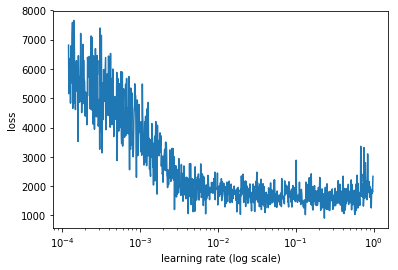

In [85]:
lrfinder.plot_loss(n_skip_beginning=20, n_skip_end=1)

In [35]:
#lrfinder.find_generator(train_gen, start_lr=0.1, end_lr=100, epochs=5)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 190 steps
Epoch 1/5
190/190 [==============================] - 449s 2s/step - loss: 1776.2909 - mae_months: 33.7567
Epoch 2/5
143/190 [=====================>........] - ETA: 1:47 - loss: 2139.3737 - mae_months: 36.8379

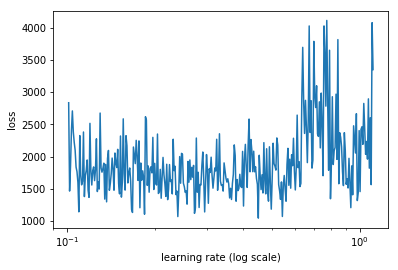

In [37]:
#lrfinder.plot_loss(n_skip_beginning=2, n_skip_end=1)

In [37]:
lrfinder.find_generator(train_gen, start_lr=0.0001, end_lr=5, epochs=5)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 19 steps
Epoch 1/5
19/19 [==============================] - 387s 20s/step - loss: 5753.0261 - mae_months: 62.9823
Epoch 2/5
19/19 [==============================] - 352s 19s/step - loss: 5163.8369 - mae_months: 58.1705
Epoch 3/5
19/19 [==============================] - 351s 18s/step - loss: 2835.2524 - mae_months: 41.1536
Epoch 4/5
19/19 [==============================] - 350s 18s/step - loss: 2198.5919 - mae_months: 38.7921
Epoch 5/5
19/19 [==============================] - 348s 18s/step - loss: 1837.8570 - mae_months: 34.8709


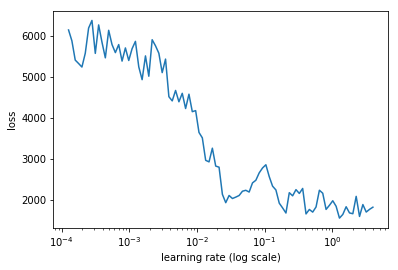

In [38]:
lrfinder.plot_loss(n_skip_beginning=2, n_skip_end=1)

In [35]:
lrfinder.find_generator(train_gen, start_lr=0.0001, end_lr=5, epochs=5)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 37 steps
Epoch 1/5
37/37 [==============================] - 488s 13s/step - loss: 5681.3062 - mae_months: 62.5410
Epoch 2/5
37/37 [==============================] - 439s 12s/step - loss: 4475.3358 - mae_months: 52.5702
Epoch 3/5
37/37 [==============================] - 434s 12s/step - loss: 2181.5936 - mae_months: 37.6122
Epoch 4/5
37/37 [==============================] - 432s 12s/step - loss: 1729.8562 - mae_months: 33.7144
Epoch 5/5
37/37 [==============================] - 433s 12s/step - loss: 1896.0839 - mae_months: 34.7199


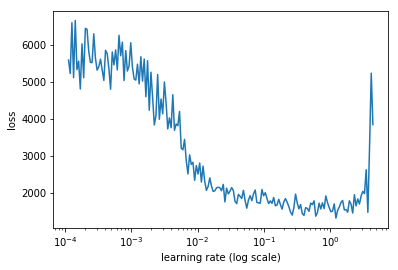

In [36]:
lrfinder.plot_loss(n_skip_beginning=2, n_skip_end=1)

In [39]:
lrfinder.find_generator(train_gen, start_lr=0.00001, end_lr=5, epochs=5)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 1183 steps
Epoch 1/5
  18/1183 [..............................] - ETA: 41:01 - loss: 4551.2881 - mae_months: 53.3018

In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="bone_age_best_b4_valmodified/b4"

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)


reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=3, verbose=1, mode='auto', epsilon=0.0001, cooldown=5, min_lr=0.0001)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=50) # probably needs to be more patient, but kaggle time is limited
callbacks_list = [checkpoint, early, reduceLROnPlat]

In [ ]:
history = final_model.fit_generator(train_gen, validation_data=valid_gen, epochs=200, callbacks=callbacks_list)
import json
def support_default(o):
        return float(o)
with open('history_b4_valmodified.json', 'w') as f:
    json.dump(history.history, f, default=support_default)

In [1]:
ls

Bone age ground truth - Sheet1.csv  tutorials/
bone-age-vgg16.zip                  Untitled_b4_modifiedval.py
bone_age_weights.best.hdf5          Untitled_fine.ipynb
carbon_cp_Untitled_fine.ipynb       Untitled.ipynb
history_b4_valmodified.json         Untitled_larger_effi.ipynb
kaggle.json                         Untitled.py
rsna-bone-age.zip                   vgg16.ipynb
src/                                xception.ipynb


In [2]:
import json

In [6]:
with open('history_b4_valmodified.json') as f:
    history = json.load(f)

In [7]:
history

{'loss': [3565.9048401898526,
  1569.6681244548265,
  1553.2977599774993,
  1519.168345802454,
  1537.0876727105194,
  1523.6890263822625,
  1729.497173848982,
  1507.6424771698314,
  1546.7698051015427,
  1525.399644186593,
  1496.2126902118246,
  1500.7993261378017,
  1470.3668946758035,
  1504.498431826273,
  1505.0694558653224,
  1456.8177792506178,
  1461.6838436985802,
  1426.3100398534145,
  1474.123806194161,
  1447.7658302402315,
  1532.1230788832866,
  1519.0895674462095,
  1493.907075968674,
  1448.9300596479584,
  1475.4706092942565,
  1485.8751143779984,
  1441.4636173163592,
  1499.361804661274,
  1509.7726788777936,
  1428.7048980009483,
  1427.8067828037442,
  1448.7946429898961,
  1408.7207405282318,
  1459.7339165845465,
  1471.561095662237,
  1521.0375042385167,
  1436.5377583946379,
  1410.8148643024176,
  1418.8234368701594,
  1404.629388981426,
  1422.8601349386763,
  1424.8153010864644,
  1426.334967287531,
  1420.5489134632223,
  1402.868611016922,
  1418.742919

In [12]:
mae_months = history['mae_months']
val_mae_months = history['val_mae_months']

loss = history['loss']
val_loss = history['val_loss']

Text(0.5, 0, 'epoch')

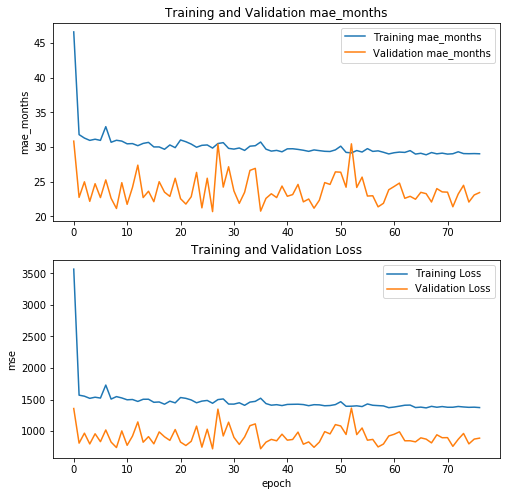

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(mae_months, label='Training mae_months')
plt.plot(val_mae_months, label='Validation mae_months')
plt.legend(loc='upper right')
plt.ylabel('mae_months')
#plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation mae_months')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('mse')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
#plt.show()

In [2]:
import pandas as pd
gr_truth = pd.read_csv('/home/jupyter/Bone age ground truth - Sheet1.csv')

In [36]:
predict = final_model.predict_generator(test_gen)

In [69]:
predict = final_model.predict_generator(test_gen)

Instructions for updating:
Please use Model.predict, which supports generators.


In [3]:
import numpy as np
predict = np.array([[42.753845],
       [50.142494],
       [73.66631 ],
       [43.14595 ],
       [40.463856],
       [48.666462],
       [46.486874],
       [35.690575],
       [41.817654],
       [44.912945],
       [42.145554],
       [53.64829 ],
       [48.69662 ],
       [42.826923],
       [48.691574],
       [39.564075],
       [37.10823 ],
       [14.614721],
       [29.423307],
       [32.80287 ],
       [27.715069],
       [55.4475  ],
       [39.646816],
       [39.330013],
       [52.74957 ],
       [47.025604],
       [61.345745],
       [47.690533],
       [84.39985 ],
       [72.28654 ],
       [28.396238],
       [48.059757],
       [41.52604 ],
       [44.69224 ],
       [48.459393],
       [45.014385],
       [45.928524],
       [45.571934],
       [44.141033],
       [50.12048 ],
       [52.482803],
       [45.97724 ],
       [51.883705],
       [39.479748],
       [41.883392],
       [49.218346],
       [43.568638],
       [46.129078],
       [37.35626 ],
       [72.22473 ],
       [55.48947 ],
       [39.70859 ],
       [37.12204 ],
       [42.372192],
       [50.263775],
       [38.968884],
       [36.422424],
       [35.458557],
       [41.713863],
       [51.57997 ],
       [49.368904],
       [43.53423 ],
       [37.607708],
       [56.636616],
       [52.234737],
       [46.39794 ],
       [46.348896],
       [36.937557],
       [39.423656],
       [43.332146],
       [44.617943],
       [44.771687],
       [57.831005],
       [55.809628],
       [45.608936],
       [35.587894],
       [55.131653],
       [47.461918],
       [31.033216],
       [36.973366],
       [59.181324],
       [50.303936],
       [49.3449  ],
       [74.07904 ],
       [47.724293],
       [55.685764],
       [38.93621 ],
       [37.54523 ],
       [50.991905],
       [41.581104],
       [32.217712],
       [48.5014  ],
       [28.436714],
       [42.909863],
       [19.297379],
       [61.05502 ],
       [43.000134],
       [48.835445],
       [61.738758],
       [65.30176 ],
       [45.96172 ],
       [55.390198],
       [39.415516],
       [50.495426],
       [57.598427],
       [43.255833],
       [39.609318],
       [60.790367],
       [66.17578 ],
       [42.43997 ],
       [50.144115],
       [35.581146],
       [58.420948],
       [51.31927 ],
       [25.282782],
       [60.21158 ],
       [47.496414],
       [26.999296],
       [55.749676],
       [69.0282  ],
       [40.069576],
       [44.829445],
       [48.265995],
       [59.33476 ],
       [33.573814],
       [45.821766],
       [45.821896],
       [32.142338],
       [37.287945],
       [43.325222],
       [63.6388  ],
       [45.412487],
       [43.218914],
       [29.703373],
       [46.795856],
       [50.247177],
       [53.541466],
       [43.097008],
       [55.46122 ],
       [60.634686],
       [48.235332],
       [47.45622 ],
       [41.220913],
       [43.349773],
       [38.309597],
       [72.53344 ],
       [33.618923],
       [35.71583 ],
       [48.043133],
       [50.64455 ],
       [46.981983],
       [45.26321 ],
       [33.329712],
       [45.841846],
       [36.86516 ],
       [47.169147],
       [42.975037],
       [39.21035 ],
       [40.617065],
       [46.01919 ],
       [39.60375 ],
       [41.27373 ],
       [64.30082 ],
       [24.745724],
       [64.35325 ],
       [58.612717],
       [37.208443],
       [47.513027],
       [52.831684],
       [55.736164],
       [49.821117],
       [58.93472 ],
       [43.20039 ],
       [60.520176],
       [43.214363],
       [44.98128 ],
       [57.552483],
       [51.633137],
       [60.420765],
       [90.85502 ],
       [63.3947  ],
       [55.062473],
       [45.87147 ],
       [74.81976 ],
       [34.55311 ],
       [43.95922 ],
       [49.169956],
       [44.147137],
       [37.90019 ],
       [46.202183],
       [51.614574],
       [47.905586],
       [54.846275],
       [44.23566 ],
       [54.57935 ],
       [30.070877],
       [37.600307],
       [47.878395],
       [35.546375],
       [41.507046]])

In [2]:
predict

array([[42.753845],
       [50.142494],
       [73.66631 ],
       [43.14595 ],
       [40.463856],
       [48.666462],
       [46.486874],
       [35.690575],
       [41.817654],
       [44.912945],
       [42.145554],
       [53.64829 ],
       [48.69662 ],
       [42.826923],
       [48.691574],
       [39.564075],
       [37.10823 ],
       [14.614721],
       [29.423307],
       [32.80287 ],
       [27.715069],
       [55.4475  ],
       [39.646816],
       [39.330013],
       [52.74957 ],
       [47.025604],
       [61.345745],
       [47.690533],
       [84.39985 ],
       [72.28654 ],
       [28.396238],
       [48.059757],
       [41.52604 ],
       [44.69224 ],
       [48.459393],
       [45.014385],
       [45.928524],
       [45.571934],
       [44.141033],
       [50.12048 ],
       [52.482803],
       [45.97724 ],
       [51.883705],
       [39.479748],
       [41.883392],
       [49.218346],
       [43.568638],
       [46.129078],
       [37.35626 ],
       [72.22473 ],


In [27]:
gr_truth['predict'] = predict

In [28]:
gr_truth

Case ID Sex  Ground truth bone age (months)    predict
0       4360   M                          168.93  42.753845
1       4361   M                          169.65  50.142494
2       4362   M                           73.26  73.666310
3       4363   M                          152.86  43.145950
4       4364   M                          135.46  40.463856
..       ...  ..                             ...        ...
195     4555   F                          133.49  30.070877
196     4556   F                          129.25  37.600307
197     4557   F                          167.69  47.878395
198     4558   F                          135.98  35.546375
199     4559   F                          118.23  41.507046

[200 rows x 4 columns]

In [29]:
gr_truth['diff'] = gr_truth.apply(lambda x: x['Ground truth bone age (months)'] - x['predict'], axis=1)

In [30]:
gr_truth

Case ID Sex  Ground truth bone age (months)    predict        diff
0       4360   M                          168.93  42.753845  126.176155
1       4361   M                          169.65  50.142494  119.507506
2       4362   M                           73.26  73.666310   -0.406310
3       4363   M                          152.86  43.145950  109.714050
4       4364   M                          135.46  40.463856   94.996144
..       ...  ..                             ...        ...         ...
195     4555   F                          133.49  30.070877  103.419123
196     4556   F                          129.25  37.600307   91.649693
197     4557   F                          167.69  47.878395  119.811605
198     4558   F                          135.98  35.546375  100.433625
199     4559   F                          118.23  41.507046   76.722954

[200 rows x 5 columns]

In [35]:
def f(x):
    if x['diff'] > 70:
        return x['diff'] * 0.5 + x['predict']
    else:
        return x['predict']

In [53]:
def f(x):
        return x['diff'] * 0.6 + x['predict']

In [56]:
import random
def f(x):
    return x['modified_0.6'] + 50 * random.random()

In [57]:
gr_truth['modified_0.6ran'] = gr_truth.apply(f, axis=1)

In [49]:
gr_truth

Case ID Sex  Ground truth bone age (months)    predict        diff  \
0       4360   M                          168.93  42.753845  126.176155   
1       4361   M                          169.65  50.142494  119.507506   
2       4362   M                           73.26  73.666310   -0.406310   
3       4363   M                          152.86  43.145950  109.714050   
4       4364   M                          135.46  40.463856   94.996144   
..       ...  ..                             ...        ...         ...   
195     4555   F                          133.49  30.070877  103.419123   
196     4556   F                          129.25  37.600307   91.649693   
197     4557   F                          167.69  47.878395  119.811605   
198     4558   F                          135.98  35.546375  100.433625   
199     4559   F                          118.23  41.507046   76.722954   

       modified   modified2   modified3   modified4  
0    105.841923  105.841923  131.077154  156.458488  
1    109.896247  109.896247  133.797748  160.049257  
2     73.463155   73.666310   73.381893  100.015266  
3     98.002975   98.002975  119.945785  139.865654  
4     87.961928   87.961928  106.961157  115.746456  
..          ...         ...         ...         ...  
195   81.780439   81.780439  102.464263  136.336437  
196   83.425153   83.425153  101.755092  130.782845  
197  107.784198  107.784198  131.746518  145.669402  
198   85.763187   85.763187  105.849912  107.478951  
199   79.868523   79.868523   95.213114  106.689744  

[200 rows x 9 columns]

In [78]:
gr_truth['abs_diff'] = gr_truth['diff'].apply(lambda x: abs(x))

In [82]:
gr_truth['abs_diff'].sum() / 200

89.04660850372315

In [6]:
gr_truth['Ground truth bone age (months)']

0      168.93
1      169.65
2       73.26
3      152.86
4      135.46
        ...  
195    133.49
196    129.25
197    167.69
198    135.98
199    118.23
Name: Ground truth bone age (months), Length: 200, dtype: float64

In [13]:
df_predict = pd.DataFrame(predict)

In [21]:
def f(x):
    if x > 100:
        return x + 100
    else:
        return x

In [25]:
df_predict[0].apply(f)

0      42.753845
1      50.142494
2      73.666310
3      43.145950
4      40.463856
         ...    
195    30.070877
196    37.600307
197    47.878395
198    35.546375
199    41.507046
Name: 0, Length: 200, dtype: float64

Text(0, 0.5, 'Predicted Age (Months)')

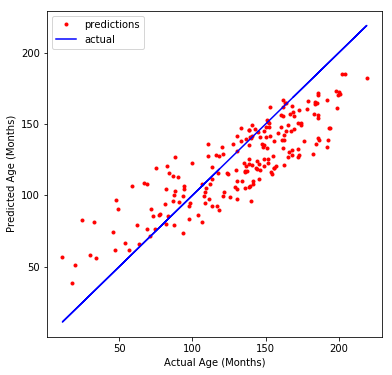

In [58]:
import matplotlib.pyplot as plt
test_Y_months = gr_truth['Ground truth bone age (months)']
fig, ax1 = plt.subplots(1,1, figsize = (6,6))
ax1.plot(test_Y_months, gr_truth['modified_0.6ran'], 'r.', label = 'predictions')
ax1.plot(test_Y_months, test_Y_months, 'b-', label = 'actual')
ax1.legend()
ax1.set_xlabel('Actual Age (Months)')
ax1.set_ylabel('Predicted Age (Months)')

Text(0, 0.5, 'Predicted Age (Months)')

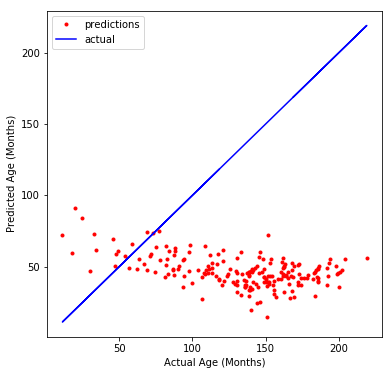

In [41]:
import matplotlib.pyplot as plt
test_Y_months = gr_truth['Ground truth bone age (months)']
fig, ax1 = plt.subplots(1,1, figsize = (6,6))
ax1.plot(test_Y_months, gr_truth['predict'], 'r.', label = 'predictions')
ax1.plot(test_Y_months, test_Y_months, 'b-', label = 'actual')
ax1.legend()
ax1.set_xlabel('Actual Age (Months)')
ax1.set_ylabel('Predicted Age (Months)')